# Characterization of channel width

## Import packages

In [1]:
import os
import glob
import random

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

from skimage import io #to load the imported image as ndarray
from skimage import data, color
from skimage.util import img_as_ubyte
from skimage.filters import threshold_triangle #used segmentation
from skimage.morphology import remove_small_objects
from skimage.segmentation import clear_border
from skimage.measure import find_contours

## Import images or data

In [2]:
#Load RGB picture
img_dir = "/Users/gonzalovidal/Gonzalo/Synthetic Biology/Corchea/FlowAnalyze/Channel_Coherence"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    imraw = io.imread(f1)
    data.append(imraw)
np_data = np.array(data)
np_data.shape #shows only the first dimension because all arrays have different shapes

(12,)

## Analyze your images or data

In [3]:
size = 45 #mm channel length used to calculate the pixel value in mm
ch_width = 5 #mm channel width used for coherence percentage
sec_ys = []
coherence_percs = []
np_sec_ys = np.array(sec_ys)

channels = np_data.shape[0]
for c in range(channels):
    ubimg = img_as_ubyte(np_data[c])
    working_image = ubimg[:,:,1] #use green channel
    binary_triangle = working_image > threshold_triangle(working_image)
    py,px = working_image.shape
    ones = np.count_nonzero(binary_triangle)
    pix_val= size/px #mm
    pix_area = pix_val**2 #mm2
    channel_estarea = size*ch_width
    channel_finarea = pix_area*((px*py)-ones)
    coherence_percs.append(channel_finarea*100/channel_estarea)
    sec_y =((1-(binary_triangle>0)).sum(axis=0)*pix_val)
    np_sec_ys = np.concatenate((np_sec_ys, sec_y), axis=None)
    

In [4]:
np.mean(np_sec_ys)

5.038488929180942

In [5]:
np.std(np_sec_ys)

0.7231458519612263

In [6]:
np.mean(coherence_percs)

100.45759234504085

In [10]:
y_pred = np.full((np_sec_ys.shape), 5)
y_true = np_sec_ys
mean_squared_error(y_true, y_pred)

0.5244213208782235

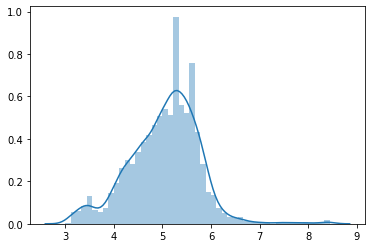

In [13]:
sns.distplot(np_sec_ys)

## Random quality test

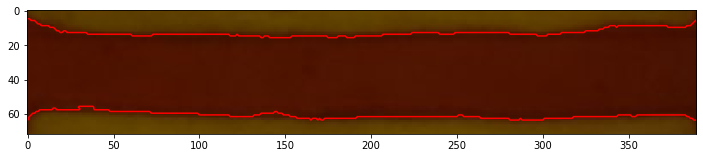

In [32]:
imraw = random.choice(np_data)
#Selection of the channel 3rd dimension (color)
red_ch= imraw[:,:,0] #imagen original en el canal rojo
green_ch = imraw[:,:,1] #imagen original en el canal verde

#Obtain the channel as ubyte
red_chuby = img_as_ubyte(red_ch)
green_chuby = img_as_ubyte(green_ch)

binary_triangle = green_ch > threshold_triangle(green_chuby)#ejemplo de como implementar un threshold, se puede cambiar por cualquiera de los anteriores
area_min= 10 #test with 100 and 1000 to see if it is working properly, elegir un minimo para OMM
binary_triangle_rso = remove_small_objects(binary_triangle, min_size=area_min) #not working well

plt.figure(figsize=(12,12))
plt.imshow(imraw, cmap='gray')
contours1 = find_contours(binary_triangle_rso>0, 0.5)
for n,contour in enumerate(contours1):
    plt.plot(contour[:,1], contour[:,0], 'r')